In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import inf
import seaborn as seab
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Now, In this part of the tutorial, I am interested to see how does COVID-19 impacts the US stock market. 

For those who have experience in the stock market, we are all aware that the stock market has experienced significant change during the COVID period. The COVID has caused fatal harm to the overall economy. One of the ways to analyze the relationship between the US economy and COVID is by looking at the stock market. I am interested to know if the COVID is one of the major factors that impact the whole stock market. In another word, was COVID bring a negative impact on the stock market. Therefore, I want to find the answer by looking at the data. However, it is difficult to include the stock of ALL the companies in the US. As the result, I would like to analyze the two most representative stocks, "S&P 500"(The S&P 500 Index or the Standard & Poor's 500 Index is a market-capitalization-weighted index of 500 of the largest publicly-traded companies in the U.S.) and "Dow Jones" (Dow Jones & Company is one of the largest business and financial news companies in the world.) to help represent the trend of US stock.

link for more information about S&P 500: https://www.investopedia.com/terms/s/sp500.asp

link for more information about Dow Jones: https://www.investopedia.com/ask/answers/who-or-what-is-dow-jones/

In [19]:
# read csv file for S&P 500 stock
SP_df = pd.read_csv("SP500.csv")
# display to see how SP500 dataframe looks like
SP_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
1,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000
2,2019-11-06,3075.100098,3078.340088,3065.889893,3076.780029,3076.780029,4458190000
3,2019-11-07,3087.020020,3097.770020,3080.229980,3085.179932,3085.179932,4144640000
4,2019-11-08,3081.250000,3093.090088,3073.580078,3093.080078,3093.080078,3499150000


In [20]:
# read csv file for Dow Jones stock
dow_df = pd.read_csv("Dow.csv")
# display to see how SP500 dataframe looks like
dow_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,27402.060547,27517.580078,27402.060547,27462.109375,27462.109375,273030000
1,2019-11-05,27500.230469,27560.359375,27453.550781,27492.630859,27492.630859,286350000
2,2019-11-06,27502.740234,27526.050781,27407.810547,27492.560547,27492.560547,237910000
3,2019-11-07,27590.160156,27774.669922,27590.160156,27674.800781,27674.800781,259020000
4,2019-11-08,27686.199219,27694.949219,27578.970703,27681.240234,27681.240234,221440000


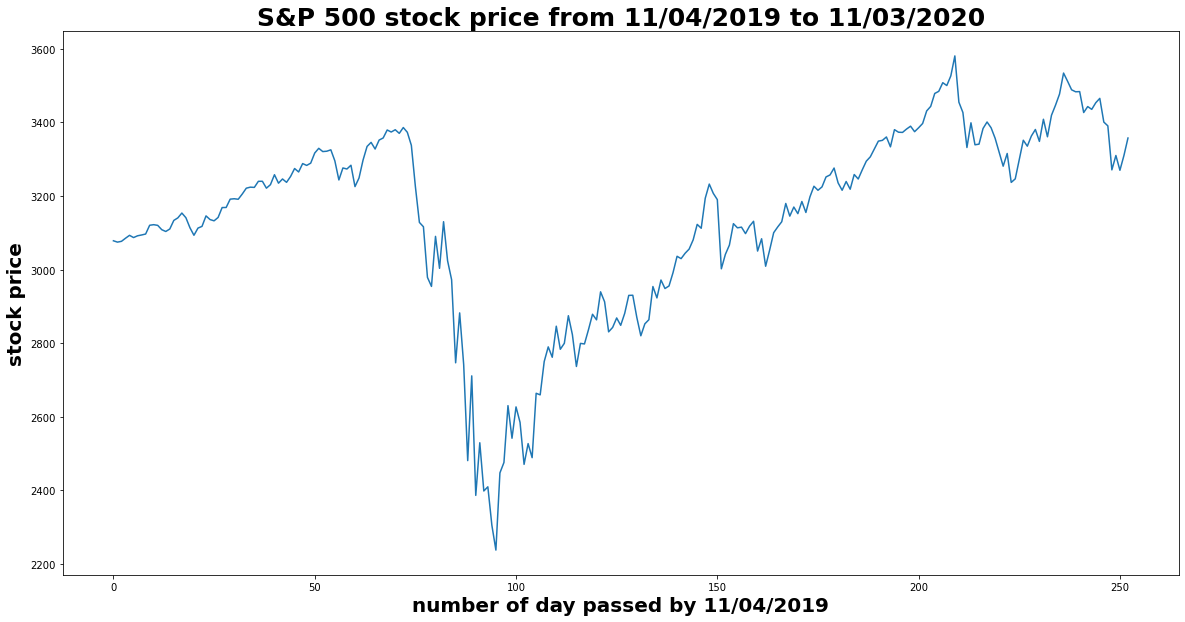

In [21]:
plt.plot(SP_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

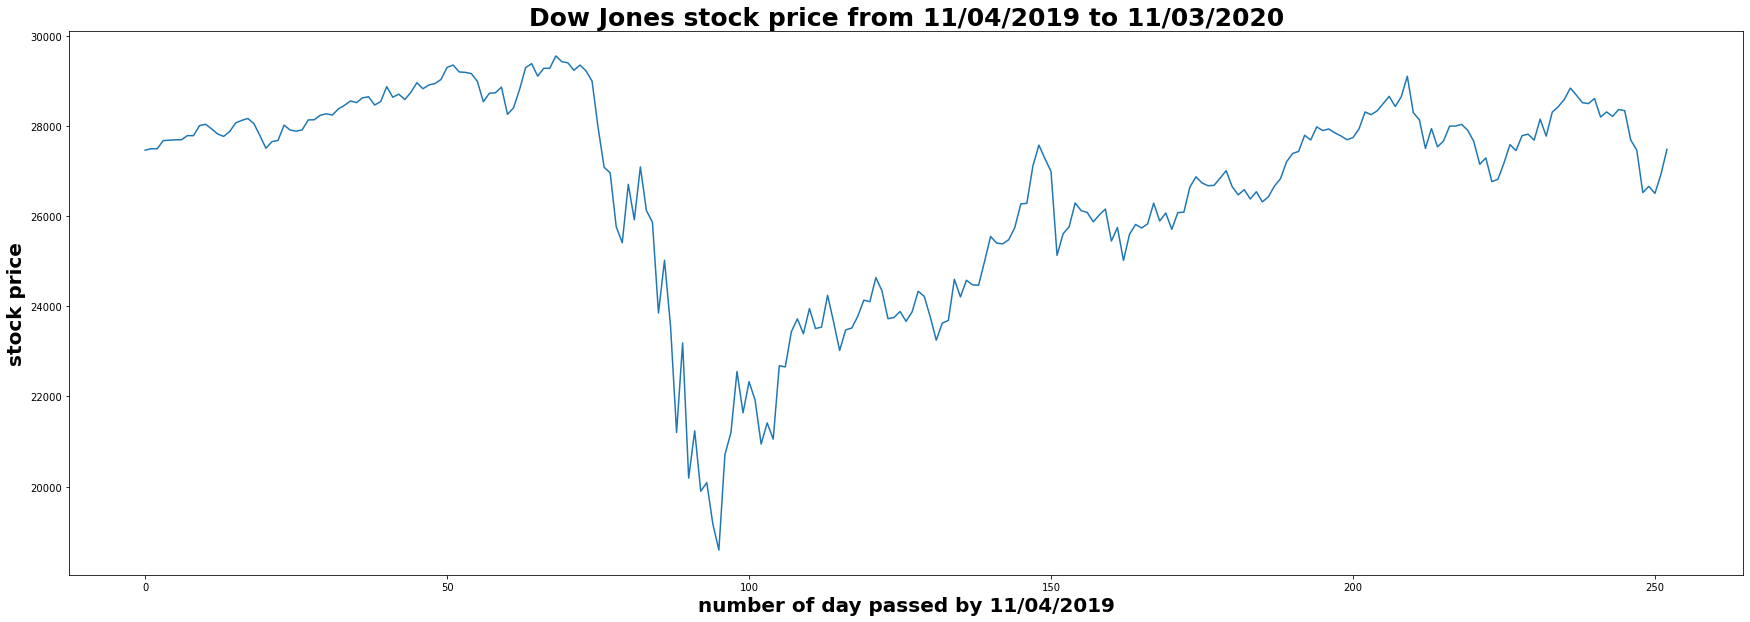

In [22]:
plt.plot(dow_df['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock price from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

It's difficult to see the change each day by directly looking at adj close price of stock. Let's see the stock price change in percentage to have a better visualization

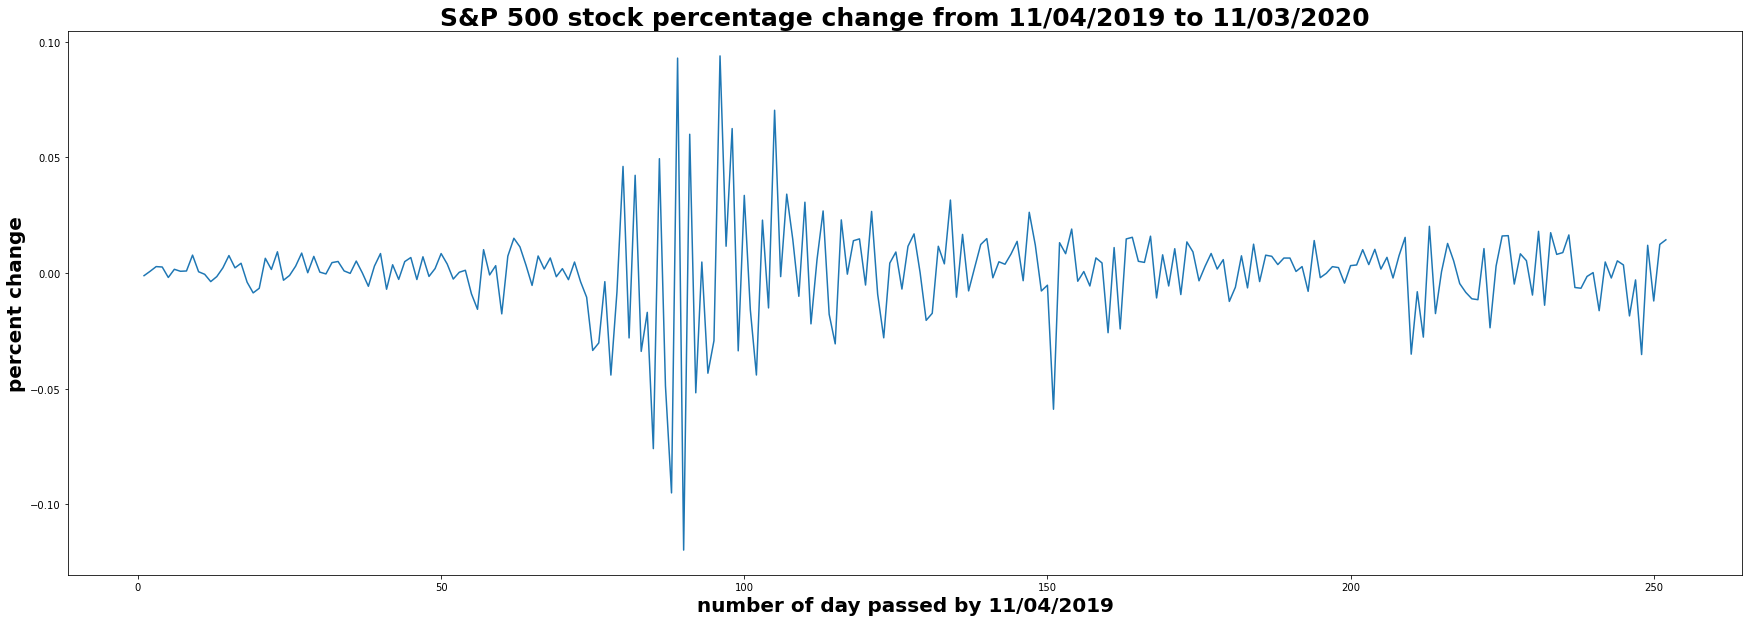

In [23]:
pct_SP500 = SP_df['Adj Close'].pct_change()
pct_dow = dow_df['Adj Close'].pct_change()

# now, Let's have a brief view of this percentage change graph
plt.plot(pct_SP500)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("S&P 500 stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

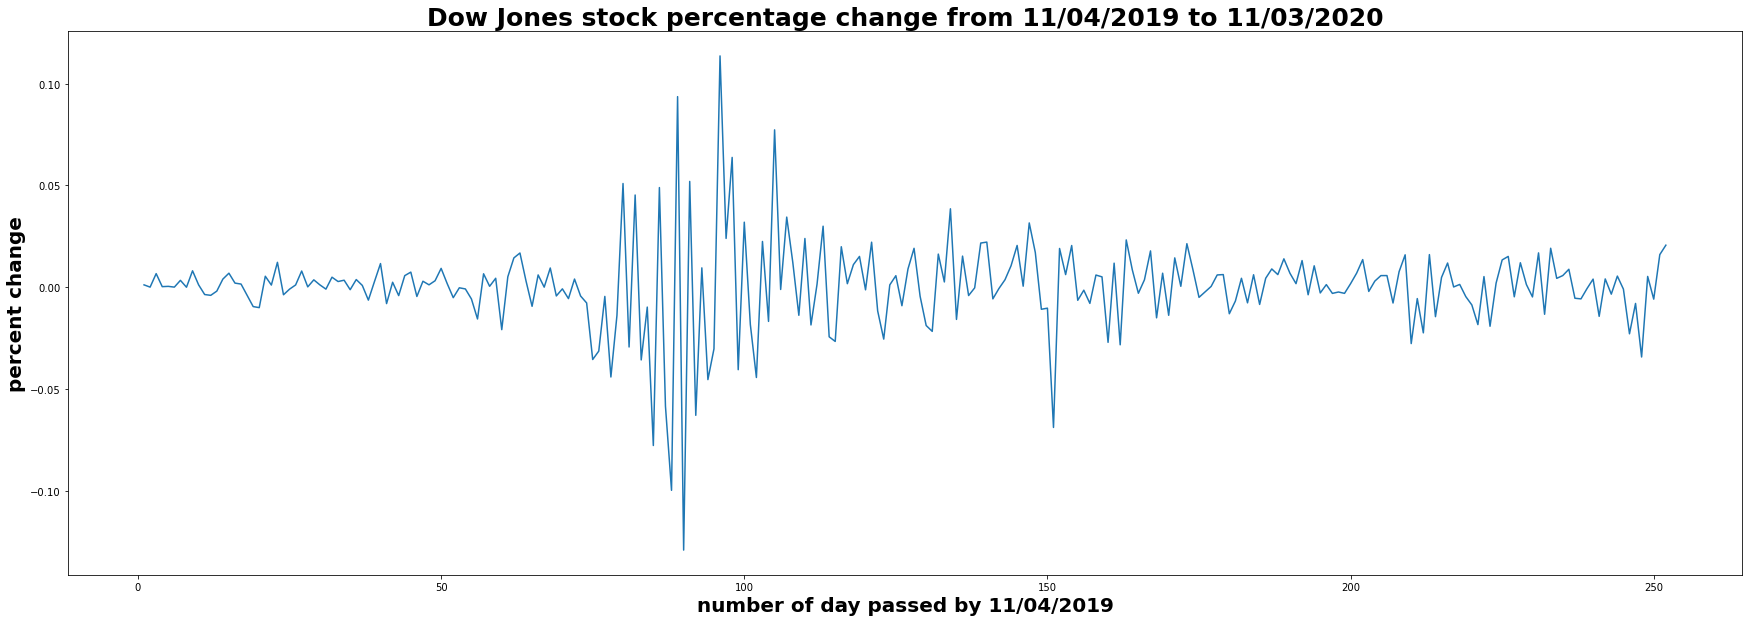

In [24]:
# now, Let's have a brief view of this percentage change graph
plt.plot(pct_dow)

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.title("Dow Jones stock percentage change from 11/04/2019 to 11/03/2020", size=25, weight='bold')
plt.show()

By looking at the percentage change above, it's clear to see these 2 stocks are extremely volatile after 2/5 of the graph, which is exactly when the covid started. This indicates that COVID had a great impact on the stock market, but we want to analyze further whether it has a positive or negative impact on the stock market. 

So now, we want to compare the stock market before the covid and after the covid period. In order to do so, I will first find the date that the US has the first COVID case confirmed, which is 2/26/2020. And then split the data into half and compare to see how stock price change due to COVID

In [25]:
# we get that 2020-02-26 is at index 77 of dataframe
SP_df.loc[SP_df['Date'] == '2020-02-26']

,Date,Open,High,Low,Close,Adj Close,Volume
77,2020-02-26,3139.899902,3182.51001,3108.98999,3116.389893,3116.389893,5478110000


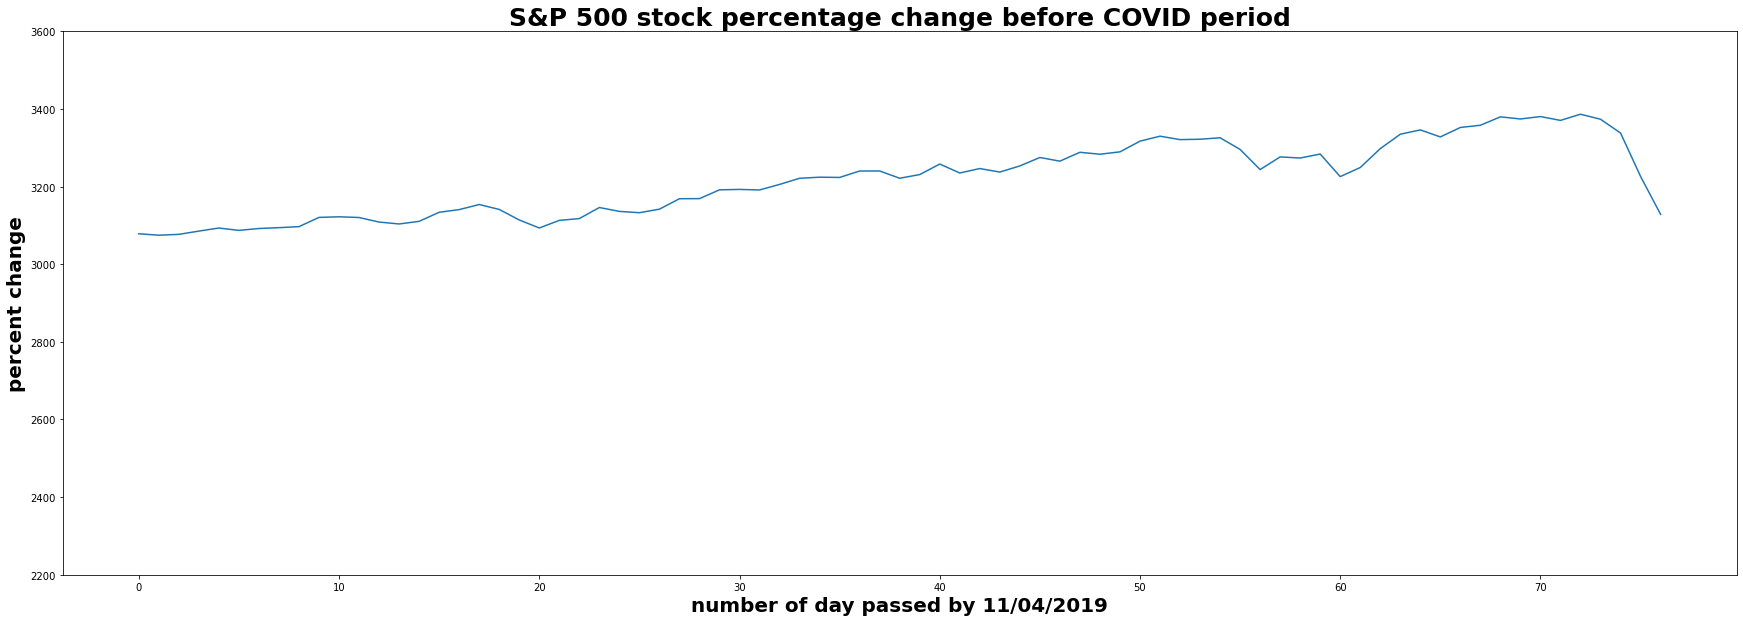

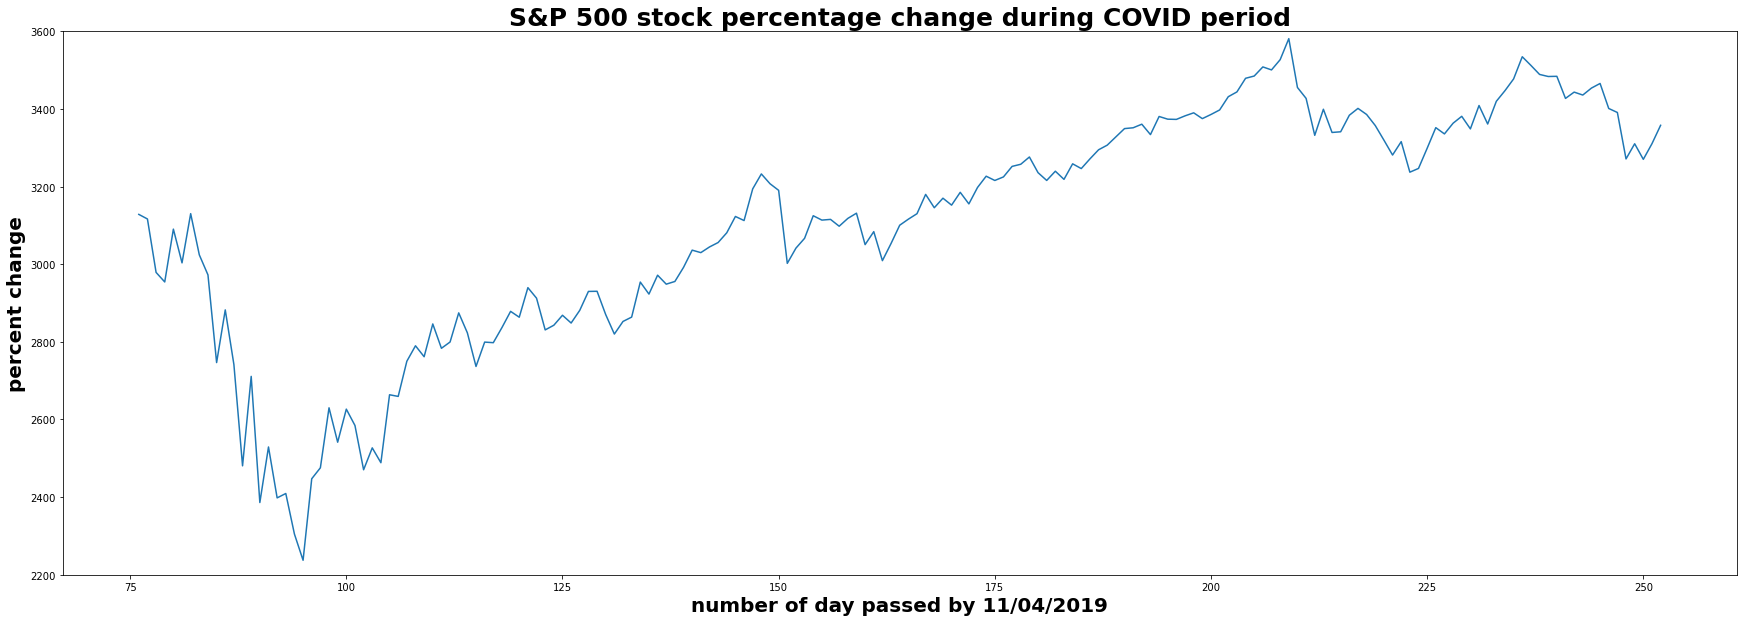

In [26]:
before_covid = SP_df.head(77)
during_covid = SP_df.tail(177)
plt.plot(before_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((2200,3600))
plt.title("S&P 500 stock percentage change during COVID period", size=25, weight='bold')
plt.show()

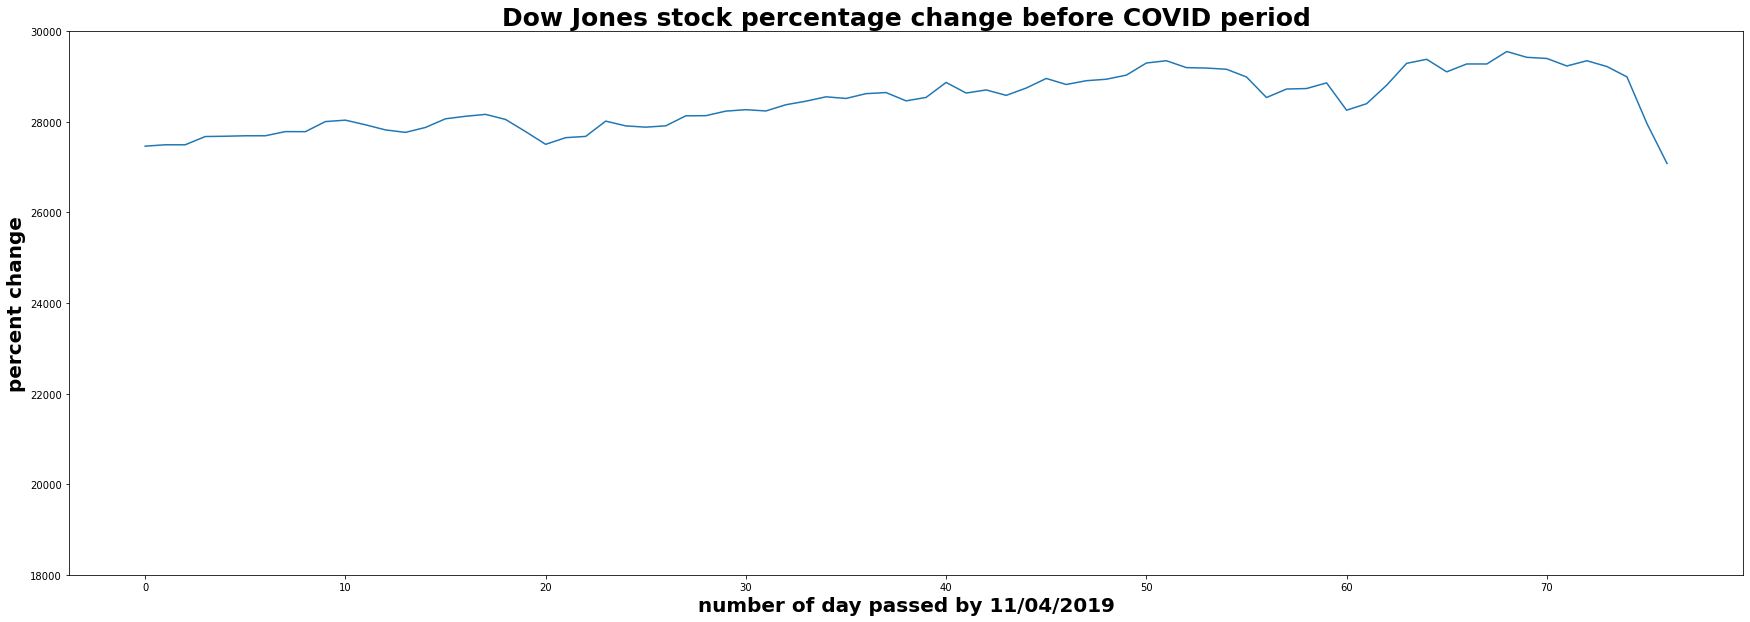

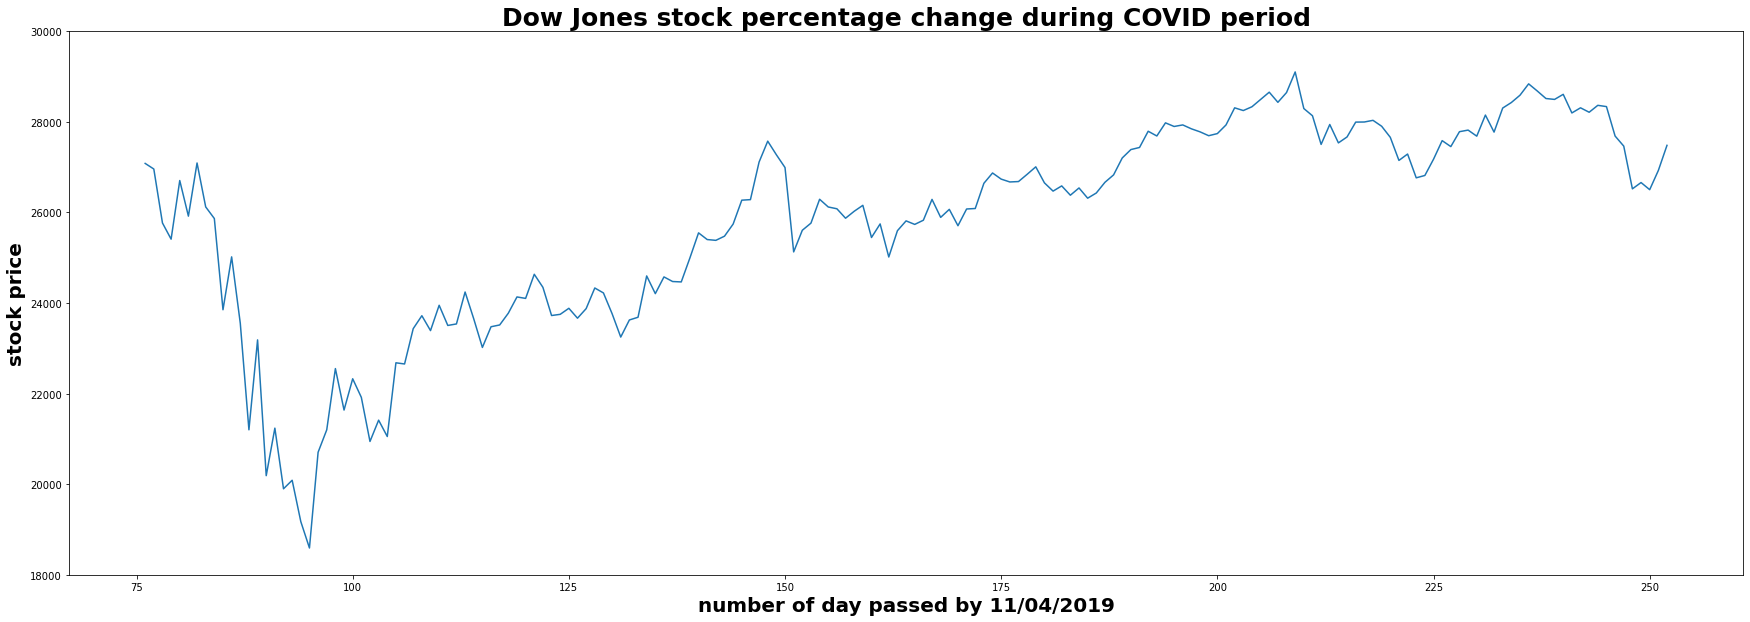

In [27]:
before_covid_dow = dow_df.head(77)
during_covid_dow = dow_df.tail(177)

plt.plot(before_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("percent change", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change before COVID period", size=25, weight='bold')
plt.show()

plt.plot(during_covid_dow['Adj Close'])

# note that stock market only open during weekday(Monday - Friday), there are only 253 days in a year. 
plt.xlabel("number of day passed by 11/04/2019", size=20, weight='bold')
plt.ylabel("stock price", size=20, weight='bold')
plt.rcParams["figure.figsize"] = [30,10]
plt.ylim((18000,30000))
plt.title("Dow Jones stock percentage change during COVID period", size=25, weight='bold')
plt.show()

First, let's look at the before COVID period for both stocks. The general trend for both stocks was increasing slowly. However, at the beginning of the COVID period, both stocks had experienced significant decreases! This means that the first detection of the COVID case had caused a huge panic in the stock market, which leads to dramatically decrease for both the S&P 500 and Dow Jones. Although both stock prices are slowing going back to their peak, it's still obvious to show that COVID had brought a huge negative impact on the stock market, especially during late March and early April. And COVID is one of the factors that affect the stock market.